In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import seaborn as sns
import scipy

# csv to csv
round coordinates

In [10]:
def csv_to_csv(season):
    filename='anom6k_%s.csv'%season
    df= pd.read_csv(filename,skipinitialspace=True,header=0)  
    lat=df['lat']
    lon=df['lon']
    anom=df['anom']
    lat1=np.zeros(len(lat))
    lon1=np.zeros(len(lon))
    anom1=np.zeros(len(anom))
    for i in range(len(lat1)):
        anom1[i]=anom[i]
        r1=lat[i]
        c1=lon[i]
        if r1<0:
            r=int(r1)-0.5
        else:
            r=int(r1)+0.5
        
        if c1<0:
            c=int(c1)-0.5
        else:
            c=int(c1)+0.5     
        lat1[i]=r
        lon1[i]=c        
    f='mh_reconss/%s_try.csv'%season
    d=pd.DataFrame({'lat':lat1,'lon':lon1,'anom':anom1})
    d.to_csv(f)

In [11]:
csv_to_csv('summer')
csv_to_csv('winter')
csv_to_csv('annual')

# csv to nc

In [2]:
def csv_to_nc(season):
    filename='mh_reconss/%s.csv'%season
    df1= pd.read_csv(filename,skipinitialspace=True,header=0)
    lat1=df1['lat']
    lon1=df1['lon']
    anom1=df1['anom']
    zz1=np.zeros((180,360))
    for i in range(len(lat1)):
        r1=lat1[i]
        c1=lon1[i]       
        r=int(r1+89.5)
        c=int(c1+179.5)                  
        val1=anom1[i]
        zz1[r][c]=val1
    mask1 = zz1==0
    aaa1=ma.array(zz1,mask=mask1)
    xnan1=np.ma.filled(aaa1, np.nan)
    return xnan1
    

In [3]:
summer=csv_to_nc('summer')
winter=csv_to_nc('winter')
annual=csv_to_nc('annual')

In [4]:
s_w=summer-winter

In [44]:
#Create netCDF4 file to store data
lonS=np.arange(-179.5,180,1)
latS=np.arange(-89.5,90,1)

d=Dataset('mh_reconss/anom6k_1x1.nc','w',format='NETCDF4')
d.createDimension('lon',360)  
d.createDimension('lat',180)  
d.createVariable("lon",'f',("lon"))  
d.createVariable("lat",'f',("lat"))  
d.variables['lat'][:]=latS     
d.variables['lon'][:]=lonS 
d.createVariable('diff_s_w','f',('lat','lon'))
d.variables['diff_s_w'][:]=s_w 
d.createVariable('summer','f',('lat','lon'))
d.variables['summer'][:]=summer
d.createVariable('winter','f',('lat','lon'))
d.variables['winter'][:]=winter 
d.createVariable('annual','f',('lat','lon'))
d.variables['annual'][:]=annual 
d.close()




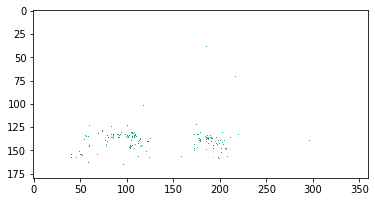

In [45]:
plt.imshow(s_w)

In [6]:
RE={}
RE['lat']=[]
RE['lon']=[]
RE['s_w']=[]
RE['row']=[]
RE['col']=[]
for row in range(180):
    for col in range(360):
        val=str(s_w[row][col])
        if val != 'nan':
            RE['row'].append(row)
            RE['col'].append(col)
            RE['s_w'].append(val)            
            if row<90:
                r=row-89.5
            else:
                r=row-88.5
            if col<180:
                c=col-179.5
            else:
                c=col-178.5
            RE['lat'].append(r)
            RE['lon'].append(c)
RR=pd.DataFrame(RE)
RR.to_csv('SW_point.csv')

In [7]:
RE={}
RE['lat']=[]
RE['lon']=[]
RE['anom']=[]
RE['row']=[]
RE['col']=[]
for row in range(180):
    for col in range(360):
        val=str(summer[row][col])
        if val != 'nan':
            RE['row'].append(row)
            RE['col'].append(col)
            RE['anom'].append(val)            
            if row<90:
                r=row-89.5
            else:
                r=row-88.5
            if col<180:
                c=col-179.5
            else:
                c=col-178.5
            RE['lat'].append(r)
            RE['lon'].append(c)
RR=pd.DataFrame(RE)
RR.to_csv('summer_point.csv')

In [8]:
RE={}
RE['lat']=[]
RE['lon']=[]
RE['anom']=[]
RE['row']=[]
RE['col']=[]
for row in range(180):
    for col in range(360):
        val=str(winter[row][col])
        if val != 'nan':
            RE['row'].append(row)
            RE['col'].append(col)
            RE['anom'].append(val)            
            if row<90:
                r=row-89.5
            else:
                r=row-88.5
            if col<180:
                c=col-179.5
            else:
                c=col-178.5
            RE['lat'].append(r)
            RE['lon'].append(c)
RR=pd.DataFrame(RE)
RR.to_csv('winter_point.csv')

In [9]:
RE={}
RE['lat']=[]
RE['lon']=[]
RE['anom']=[]
RE['row']=[]
RE['col']=[]
for row in range(180):
    for col in range(360):
        val=str(annual[row][col])
        if val != 'nan':
            RE['anom'].append(val) 
            RE['row'].append(row)
            RE['col'].append(col)
            if row<90:
                r=row-89.5
            else:
                r=row-88.5
            if col<180:
                c=col-179.5
            else:
                c=col-178.5
            RE['lat'].append(r)
            RE['lon'].append(c)
RR=pd.DataFrame(RE)
RR.to_csv('annual_point.csv')

In [9]:
recons_file1='mh_recons/warmtemp_delta_06ka_ALL_grid_2x2.nc'
recons_file2='mh_recons/coldtemp_delta_06ka_ALL_grid_2x2.nc'
var1='mtwa_anm_mean'
var2='mtco_anm_mean'
var1e='mtwa_se_mean'
var2e='mtco_se_mean' 
recons_data1=Dataset(recons_file1)
recons_data2=Dataset(recons_file2)
recons_var1=recons_data1[var1][:]
recons_var2=recons_data2[var2][:]
recons_err1=recons_data1[var1e][:] 
recons_err2=recons_data2[var2e][:]
xnan1=np.ma.filled(recons_var1, np.nan)
xnan2=np.ma.filled(recons_err2, np.nan)
xnan=xnan1-xnan2

In [10]:
lonS=np.linspace(-179,179,180)
latS=np.linspace(-89,89,90)

d=Dataset('mh_recons/bartlein_mtwa_mtco.nc','w',format='NETCDF4')
d.createDimension('lon',180)  
d.createDimension('lat',90)  
d.createVariable("lon",'f',("lon"))  
d.createVariable("lat",'f',("lat"))  
d.variables['lat'][:]=latS     
d.variables['lon'][:]=lonS 
d.createVariable('diff_mtwa_mtco','f',('lat','lon'))
d.variables['diff_mtwa_mtco'][:]=xnan   
d.close()

In [11]:
mask= xnan==np.nan
recons_errr1=ma.array(recons_err1,mask=mask)
xnane1=np.ma.filled(recons_errr1, np.nan)
recons_errr2=ma.array(recons_err2,mask=mask)
xnane2=np.ma.filled(recons_errr2, np.nan)

In [20]:
d=Dataset('bartlein_mtwa_mtco.nc')

e1=d.variables['mtwa_err'][:]
r1=d.variables['diff_mtwa_mtco'][:]
e2=d.variables['mtco_err'][:]
d.close()

In [15]:
for r in range(90):
    for c in range(180):
        if r1[r][c]<-500:
            r1[r][c]=np.nan
        if e1[r][c]>500:
            e1[r][c]=np.nan
        if e2[r][c]>500:
            e2[r][c]=np.nan
            

In [16]:
d.close()

In [12]:
d=Dataset('mh_recons/bartlein_mtwa_mtco.nc','a')

d.variables['mtwa_err'][:]=xnane1

d.variables['mtco_err'][:]=xnane2  
d.close()

In [21]:
po={}
po['lat']=[]
po['lon']=[]
po['ref']=[]
for row in range(90):
    for col in range(180):          
        val_var=str(r1[row][col])
        if val_var != 'nan':
            val=float(val_var)
            po['ref'].append(val)
            po['lat'].append(row)
            po['lon'].append(col)
f1='mh_recons/bartlein_recons_points.csv'
R=pd.DataFrame(po)
R.to_csv(f1)

In [7]:
err1=ma.array(recons_err1,mask=mask)
xnane1=np.ma.filled(err1, np.nan)
err2=ma.array(recons_err2,mask=mask)
xnane2=np.ma.filled(err2, np.nan)

In [23]:
po={}
po['lat']=[]
po['lon']=[]
po['ref']=[]
for row in range(90):
    for col in range(180):          
        val_var=str(e1[row][col])
        if val_var != 'nan':
            val=float(val_var)
            po['ref'].append(val)
            po['lat'].append(row)
            po['lon'].append(col)
f1='mh_recons/bartlein_mtwa_err_recons_points.csv'
R=pd.DataFrame(po)
R.to_csv(f1)